# Exploratory Data Analysis (EDA)

Sections: Geo viz, Correlations, Feature engineering, Save processed dataset.

In [9]:
# EDA — Exploratory Data Analysis
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

TRAIN_DIR = Path("../data/train")
TEST_DIR  = Path("../data/test")

train_features = pd.read_csv(TRAIN_DIR / "train_features.csv")
train_labels   = pd.read_csv(TRAIN_DIR / "train_labels.csv")
test_features  = pd.read_csv(TEST_DIR  / "test_features.csv")
test_labels    = pd.read_csv(TEST_DIR  / "test_labels.csv")

print("train_features:", train_features.shape, "train_labels:", train_labels.shape)
train_features.head()

train_features: (16512, 9) train_labels: (16512, 1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [12]:
train_features.info()
train_features.describe().T

# Missing values by column
train_features.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


total_bedrooms        168
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

## Geographic data visualization

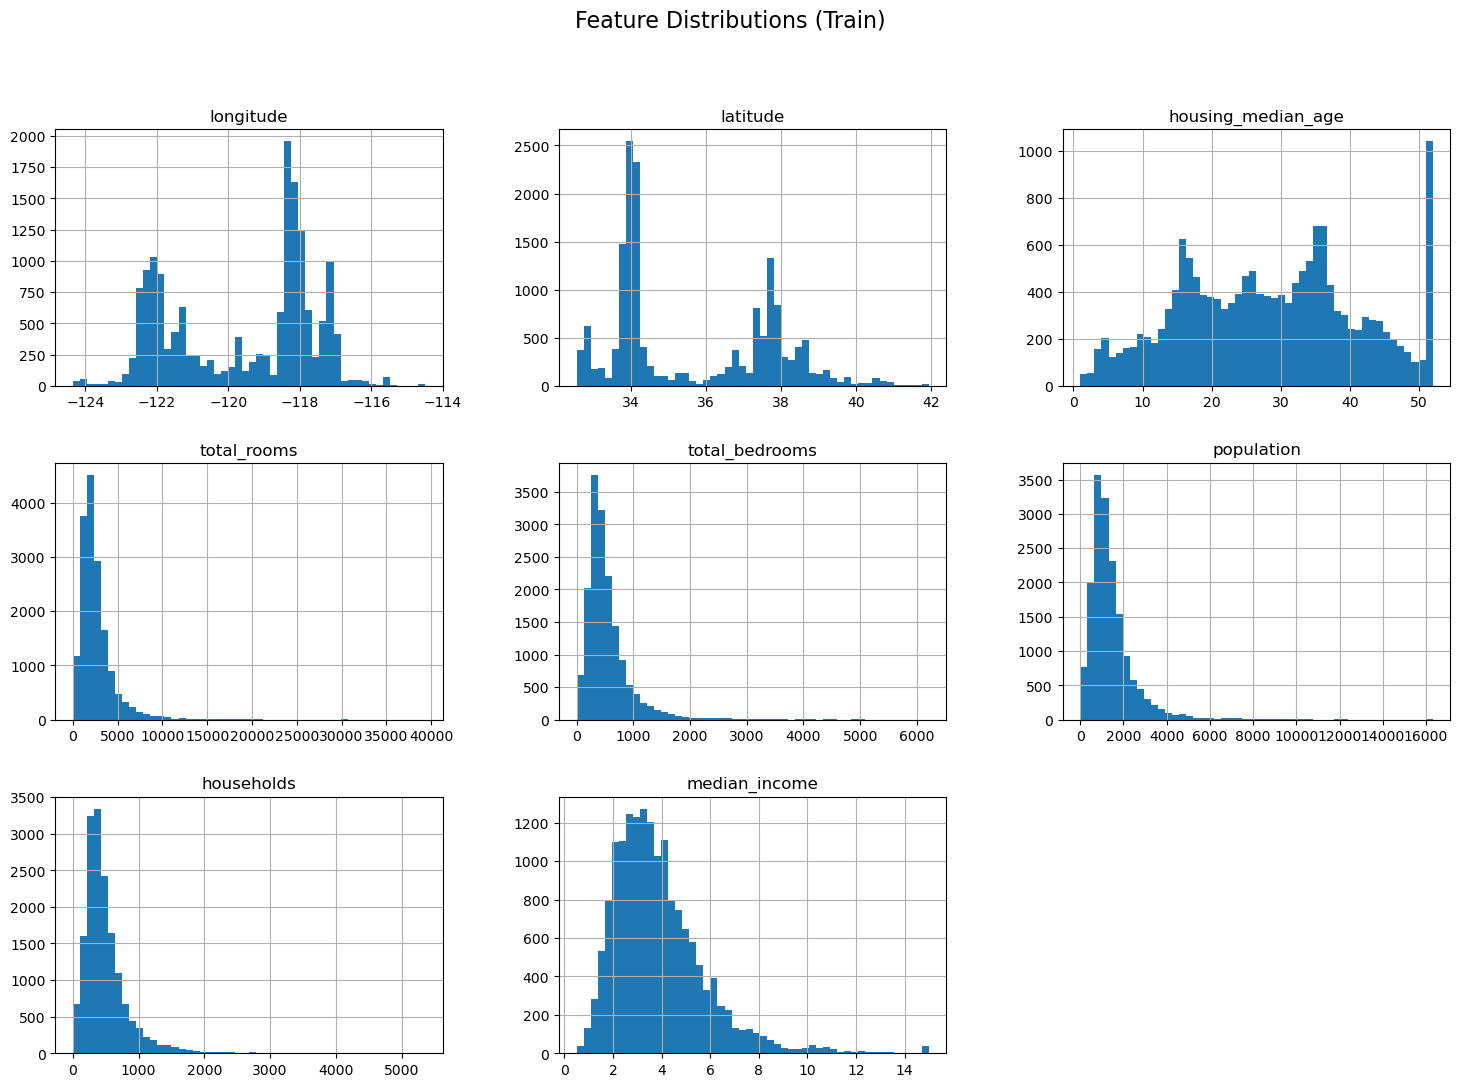

In [13]:
_ = train_features.hist(bins=50, figsize=(18,12))
plt.suptitle("Feature Distributions (Train)", fontsize=16)
plt.show()


In [14]:
# correlations with the target
corr_with_target = housing.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)
corr_with_target.head(12)


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

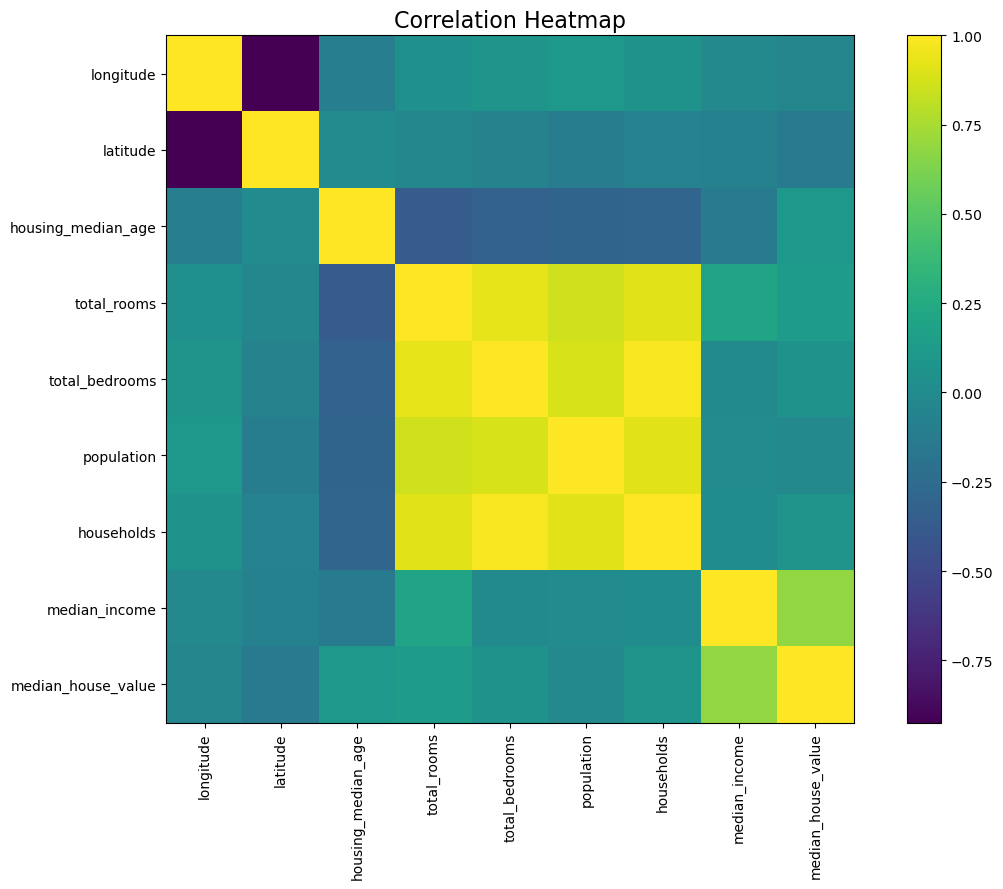

In [15]:
# full heatmap
corr = housing.corr(numeric_only=True)
plt.figure(figsize=(12,9))
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Heatmap", fontsize=16)
plt.colorbar()
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns)
plt.tight_layout()
plt.show()


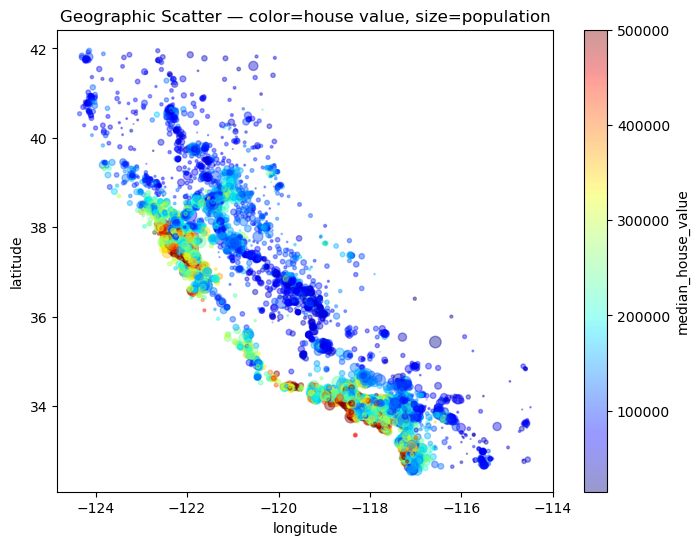

In [16]:
ax = housing.plot(
    kind="scatter",
    x="longitude", y="latitude",
    alpha=0.4, figsize=(8,6),
    s=housing["population"]/100,      # bubble size ~ population
    c="median_house_value", cmap="jet", colorbar=True,
)
ax.set_title("Geographic Scatter — color=house value, size=population")
plt.show()


## Feature correlation analysis

In [17]:
fe = train_features.copy()

fe["rooms_per_household"]        = fe["total_rooms"] / fe["households"]
fe["bedrooms_per_room"]          = fe["total_bedrooms"] / fe["total_rooms"]
fe["population_per_household"]   = fe["population"] / fe["households"]

fe.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,0.335742,1.524178
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,0.180153,1.865546
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,5.334975,0.200369,2.768473
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,0.203881,2.365385
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,0.277371,1.631399


In [ ]:
corr = df.corr(numeric_only=True)
corr['median_house_value'].sort_values(ascending=False).head(10)

## Feature engineering & creation

In [ ]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.head()

## Final: Save processed dataset (e.g., 24 features) into data/train

In [ ]:
df.to_csv('data/train/train_processed.csv', index=False)
print('Saved data/train/train_processed.csv')